In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error 


T_0 = pd.read_excel('FAKFL1y.xlsx')
T=np.array(T_0)
#from sklearn import preprocessing  
#min_max_scaler = preprocessing.MinMaxScaler() 
#T=T_minMax = min_max_scaler.fit_transform(T)
#T=T.ravel()

print(T)  
print(len(T))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
2053


In [ ]:
#读入特征    1000种描述符数据 
X=pd.read_excel('FAKFLx.xlsx')
X=np.array(X) 
#min_max_scaler = preprocessing.MinMaxScaler() 
#X=X_minMax = min_max_scaler.fit_transform(X)
print(X)
print(len(X[0]))
print(len(X))

[[ 1  1  0 ...  0  0 26]
 [ 1  1  0 ...  0  0 21]
 [ 0  1  0 ...  0  0 28]
 ...
 [ 0  1  0 ...  0  0 19]
 [ 0  0  0 ...  0  0 21]
 [ 0  0  1 ...  0  0 11]]
1331
2053


In [4]:

# FAK 1 -8

In [5]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.100,random_state=11)

In [28]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
import lightgbm as lgbm

clf=lgbm.LGBMClassifier(boosting_type='gbdt',colsample_bytree=0.8,feature_fraction=0.9,bagging_fraction=0.1,num_leaves=20,min_child_samples=70,max_depth=-1,
                        learning_rate=0.05,n_estimators=400, n_jobs=1)
clf.fit(X_train,T_train)


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.9


LGBMClassifier(bagging_fraction=0.1, colsample_bytree=0.8, feature_fraction=0.9,
               learning_rate=0.05, min_child_samples=70, n_estimators=400,
               n_jobs=1, num_leaves=20)

In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
plt.style.use('ggplot')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regressor = lgb.LGBMRegressor(n_estimators=200, n_jobs=1)
regressor.fit(X_train,T_train)
lgb.LGBMRegressor(boosting_type='gbdt', class_weight=0.5, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=4,
       min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=900, n_jobs=-1, num_leaves=31,random_state=42, reg_alpha=0.01, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(class_weight=0.5, learning_rate=0.01, max_depth=4,
              min_child_samples=1, n_estimators=900, random_state=42,
              reg_alpha=0.01)

In [8]:
import pandas as pd
import numpy as np
import time
import logging
import os, sys
import psutil
import lightgbm as lgb
from datetime import datetime

from itertools import cycle
from sklearn import svm
from sklearn.metrics import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.externals import joblib
from scipy import interp

T_pred = clf.predict(X_test)
confusion_matrix(T_test, T_pred)

array([[ 86,   0],
       [  2, 118]])

In [9]:
print (classification_report(T_test, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9773    1.0000    0.9885        86
           1     1.0000    0.9833    0.9916       120

    accuracy                         0.9903       206
   macro avg     0.9886    0.9917    0.9901       206
weighted avg     0.9905    0.9903    0.9903       206



In [10]:
f1=f1_score(T_test,T_pred,average='micro')
print("the f1 score: %.3f"%f1)

the f1 score: 0.990


<Figure size 1000x1000 with 0 Axes>

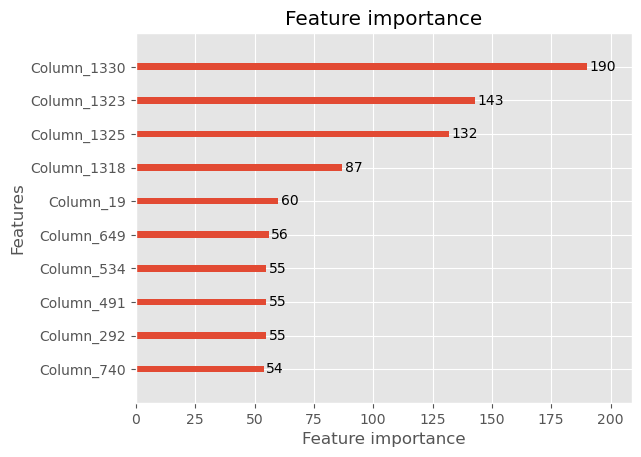

In [11]:
from lightgbm import plot_importance
# 显示重要特征
fig = plt.figure(figsize=(10,10))
plot_importance(clf,max_num_features=10)
plt.show()


In [12]:
T_pred = clf.predict(X_train)
confusion_matrix(T_train, T_pred)

array([[857,   0],
       [  0, 990]])

In [13]:
print (classification_report(T_train, T_pred , digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       857
           1     1.0000    1.0000    1.0000       990

    accuracy                         1.0000      1847
   macro avg     1.0000    1.0000    1.0000      1847
weighted avg     1.0000    1.0000    1.0000      1847



In [14]:
# 十倍交叉验证

In [15]:

from sklearn.model_selection import cross_validate

clf = lgbm.LGBMClassifier(boosting_type='gbdt', colsample_bytree=0.8, feature_fraction=0.8, bagging_fraction=0.1, num_leaves=10, 
                          min_child_samples=70, max_depth=-1, learning_rate=0.05, n_estimators=400)
cv = 10  # 十倍交叉验证的折数
scoring = ['accuracy', 'precision_macro', 'f1_macro']  # 评估指标


In [16]:
scores = cross_validate(clf, X_train, T_train, cv=cv, scoring=scoring, return_train_score=True)

mean_accuracy = scores['test_accuracy'].mean()
mean_precision = scores['test_precision_macro'].mean()
mean_f1 = scores['test_f1_macro'].mean()

std_accuracy = scores['test_accuracy'].std()
std_precision = scores['test_precision_macro'].std()
std_f1 = scores['test_f1_macro'].std()

mean_train_accuracy = scores['train_accuracy'].mean()
mean_train_precision = scores['train_precision_macro'].mean()
mean_train_f1 = scores['train_f1_macro'].mean()

std_train_accuracy = scores['train_accuracy'].std()
std_train_precision = scores['train_precision_macro'].std()
std_train_f1 = scores['train_f1_macro'].std()

print(f'Mean Accuracy (Test): {mean_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'Mean Precision (Test): {mean_precision:.4f} ± {std_precision:.4f}')
print(f'Mean F1 Score (Test): {mean_f1:.4f} ± {std_f1:.4f}')

print(f'Mean Accuracy (Train): {mean_train_accuracy:.4f} ± {std_train_accuracy:.4f}')
print(f'Mean Precision (Train): {mean_train_precision:.4f} ± {std_train_precision:.4f}')
print(f'Mean F1 Score (Train): {mean_train_f1:.4f} ± {std_train_f1:.4f}')


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.8
Mean Accuracy (Test): 0.9616 ± 0.0062
Mean Precision (Test): 0.9617 ± 0.0062
Mean F1 Score (Test): 0.9613 ± 0.0062
Mean Accuracy (Train): 1.0000 ± 0.0000
Mean Precision (Train): 1.0000 ± 0.0000
Mean F1 Score (Train): 1.0000 ± 0.0000
